In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

import random
import math

In [3]:
df = pd.read_csv('housing.csv', header=None, sep='\s+')  # sep='\s+' or  sep='\t' or
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]


df.columns = column_names
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\akaku\AppData\Local\Temp\ipykernel_15508\743828371.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('housing.csv', header=None, sep='\s+')  # sep='\s+' or  sep='\t' or


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
X = df.drop(df.columns[-1], axis=1).to_numpy()
y = df['MEDV'].to_numpy()

In [5]:
test_size = 0.25

row_count = X.shape[0] 
row_count_in_samples = int(row_count * test_size)

indixes = np.random.permutation(row_count)

test_indices = indixes[:row_count_in_samples]
train_indices = indixes[row_count_in_samples:]


X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

Linear Regression 

In [6]:
def linear_regression(
        X: np.ndarray,
        y: np.ndarray,
        learning_rate: float = 0.01,
        iterations: int = 5000,
        coef_umensheniya_learning_rate: float = 0.001,
        epsilon: float = 1e-4
    ) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Линейная регрессия.

    :param X: Исходная матрица.
    :param y: Целевые значения.
    :param learning_rate: Начальная скорость.
    :param iterations: максимальное количество итераций.
    :param coef_umensheniya_learning_rate: Коэффициент уменьшения скорости сходимости.
    :param epsilon: показатель качества модели для досрочного выхода из обучения.
    :return: Кортеж: 
        - weights: Веса.
        - X_mean: Средние значения.
        - X_std: Стандартные отклонения.
        - weights_change_history: История изменения весов.
    """
    # нормализация признаков
    X_mean = np.mean(X, axis=0 )
    X_std = np.std(X, axis=0)
    # Избегаем деления на ноль
    X_std[X_std == 0] = 1
    X_normalized = (X - X_mean) / X_std
    
    # Добавление столбца единиц для свободного члена
    row, col = X_normalized.shape
    X_b = np.column_stack([np.ones(row), X_normalized])

    weights = np.random.randn(col + 1)
    weights_change_history = []

    for i in range(iterations):
        y_pred = X_b @ weights
        error = y_pred - y
        error_absolute = np.sign(error) # этот вариант сходится в 2 раза медленнее 5000 iter vs 10000 iter

        gradient = (2 / row) * X_b.T @ error
        current_lr = learning_rate * (1 / (1 + coef_umensheniya_learning_rate * i))
        old_weights = weights.copy()
        weights = weights - current_lr * gradient

        # Проверяем изменение весов
        weight_change = np.linalg.norm(weights - old_weights)
        weights_change_history.append(weight_change)

        if weight_change < epsilon:
            print(f"Сходимость достигнута на итерации {i}, изменение весов: {weight_change:.2e}")
            break

        if i == iterations - 1:
            print(f"Заданная точность НЕ достигнута за {iterations} шагов, последнее изменение весов: {weight_change:.2e}")
    
    return weights, X_mean, X_std, weights_change_history

def predict(X, weights, X_mean, X_std):
    """
    Предсказание.
    
    :param X: Исходная матрица.
    :param weights: Веса.
    :param X_mean:Средние значения.
    :param X_std: Стандартные отклонения.
    :return: Предсказание.
    """
    X_normalized = (X - X_mean) / X_std
    row = X_normalized.shape[0]
    X_b = np.column_stack([np.ones(row), X_normalized])
    return X_b @ weights

In [7]:
weights, X_mean, X_std, weights_change_history = linear_regression(X_train, y_train, iterations=1000000, epsilon=1e-8)


y_predict = predict(X_test, weights, X_mean, X_std)

Сходимость достигнута на итерации 320485, изменение весов: 1.00e-08


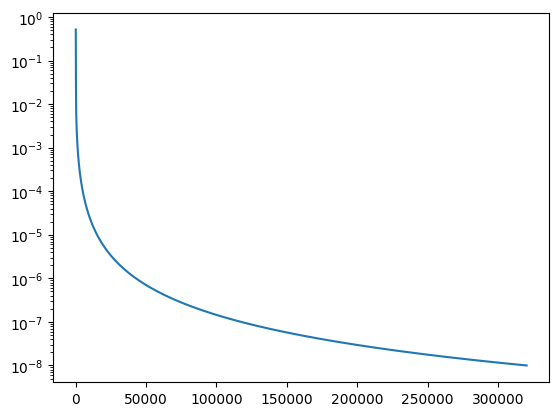

In [8]:
plt.plot(weights_change_history)
plt.yscale('log')

sklearn

In [9]:
regression = LinearRegression()
regression.fit(X_train, y_train)
y_predict_sk = regression.predict(X_test)

Результаты

In [10]:
for i in range(len(y_predict)):
    print(f'{y_predict[i]}\t{y_predict_sk[i]}\t{y_test[i]}')

27.624041585970737	27.62474167549721	22.3
24.021646760226492	24.022533278244303	22.2
24.965422007518942	24.96504908836143	24.7
33.293973629286796	33.294240373601184	31.7
21.102926126681275	21.103505976359664	20.7
29.227275988626882	29.22743764894271	26.4
20.974981809858615	20.974018029149946	18.3
26.177975296176164	26.17792681745163	22.2
20.23581497902186	20.234662991165568	22.9
17.36191530788635	17.36211947588018	13.0
21.683596286158785	21.684192603203105	19.7
21.326733307164215	21.326019079290866	21.2
23.390856029757725	23.390426931421942	20.0
24.178935883394065	24.179467840773604	23.4
16.093867464121566	16.094016251908013	14.1
27.690316557749995	27.690282927021254	36.2
22.927102918604525	22.927235312449067	17.4
23.488392610672072	23.488448594065403	19.4
22.817278216899876	22.81764619431494	23.2
24.14090851378883	24.14040497507732	21.4
19.84824443736772	19.847625637835325	15.6
23.363598089521428	23.36366334912666	23.8
25.01283503721885	25.012859930186565	21.7
24.51855153912973	24.517

In [11]:
print(f'My MSE: {np.mean((y_predict - y_test) ** 2)}')
print(f'SK MSE: {np.mean((y_predict_sk - y_test) ** 2)}')

print(f'My weights: {weights}')
print(f'SK weights: {[regression.intercept_] + list(regression.coef_)}')

My MSE: 20.133780108260314
SK MSE: 20.133926724192765
My weights: [22.61894737 -1.09434847  1.15851602  0.03640418  0.77316634 -2.58807162
  2.56114676  0.14699404 -3.35020677  2.89315165 -2.025944   -2.2573899
  0.71269325 -3.60695939]
SK weights: [np.float64(41.27148492706989), np.float64(-0.1270815810044835), np.float64(0.0487436516705954), np.float64(0.00539226474955042), np.float64(3.0621276819414596), np.float64(-21.879804977781742), np.float64(3.5942694326866222), np.float64(0.005175809109497119), np.float64(-1.5551834879828181), np.float64(0.33573590047388524), np.float64(-0.012044969658432186), np.float64(-1.0245574719164752), np.float64(0.008450220867204015), np.float64(-0.49382044973954164)]
